Link do danych: https://www.kaggle.com/datasets/shanegerami/ai-vs-human-text/data?select=AI_Human.csv

Problem: Czy tekst wygenerowany przez AI czy Human

Label: Generated by AI (1) or Human (0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

### Ładowanie danych znajdujących się na dysku

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/nlp_data/AI_Human.csv')
data.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       487235 non-null  object 
 1   generated  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB


In [ ]:
#  data.sample(frac=1) - powodujemy losową kolejnośc w danych (układ danych w kolejności label=0, później 1)
data = data.sample(frac=1).loc[:1000,:]
data.head()

,text,generated
48235,Driverless cars have been a topic of interest ...,1.0
68528,"dear principle, i think you should go with pol...",0.0
142712,Learning is an essential part of growing up. T...,1.0
295307,Being a Seagoing Cowboy was a fun and unique j...,0.0
443384,"Dear Principal,\n\nI think that the new regula...",0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401958 entries, 48235 to 1000
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       401958 non-null  object 
 1   generated  401958 non-null  float64
dtypes: float64(1), object(1)
memory usage: 9.2+ MB


In [ ]:
# zmiana nazwy kolumny generated na label
data.columns = ['text', 'label']
# sprawdzenie podziału label
print(data['label'].value_counts())  # nierówny podział, więcej tekstu napisanego przez człowieka
print(f'Kształt danych: {data.shape}')  # 2 kolumny, 487235 wierszy

label
0.0    252143
1.0    149815
Name: count, dtype: int64
Kształt danych: (401958, 2)


### Czyszczenie danych

Stopwords

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS

stopwords = list(STOP_WORDS)
print(f"Liczba stop words: {len(stopwords)}, a wyglądają następująco:\n\n",stopwords)

Liczba stop words: 326, a wyglądają następująco:

 ['had', 'itself', 're', 'ten', 'this', 'after', 'amount', 'n’t', '‘d', 'others', 'until', 'please', 'us', 'last', 'herein', 'rather', 'before', 'become', 'down', 'much', 'around', '’m', 'each', 'its', 'been', 'seeming', 'whence', '’ll', 'moreover', 'few', 'must', 'at', 'any', 'indeed', 'now', 'n‘t', 'whereby', 'was', 'through', 'afterwards', 'most', 'only', 'am', 'bottom', 'themselves', 'when', '‘ve', 'eight', 'himself', 'or', 'hundred', 'thus', 'onto', 'done', 'fifteen', 'thereupon', 'formerly', 'beforehand', 'even', 'be', 'where', 'else', 'toward', 'using', 'make', 'did', 'if', 'being', 'therefore', 'nobody', 'me', 'sometimes', 'nine', 'another', 'hence', 'per', 'every', 'with', "'m", 'one', 'get', 'there', 'and', 'less', 'across', 'latterly', 'since', 'wherever', 'on', 'ourselves', 'someone', 'some', 'put', 'mostly', 'together', 'yourselves', 'into', 'neither', 'so', 'enough', 'from', 'besides', 'made', '’ve', 'namely', 'all', 'have

Wyrażenia regularne i interpunkcja<br>

In [ ]:
import re
from string import punctuation

print(f'Interpunkcja: {punctuation}')

Interpunkcja: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


Tworzymy funkcje do czyszczenia danych

In [ ]:
# funkcja ma czyścić tekst z niechcianych znaków, cyfr, znaków html, białych znaków, zamiana na małe litery

def clean_text(text):
  text_c = text.lower()
  text_c = re.sub('\d', '', text_c)
  text_c = re.sub('<[^>]*>', '', text_c)  # wszystkie tagi HTML
  emojis = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text_c)  # szukamy w tekście znaków emotikonów
  text_c = re.sub('[\W]+', ' ', text_c) + ' '.join(emojis).replace('-', '')
  text_c = re.sub('[{}]'.format(punctuation), '', text_c)
  text_c = text_c.strip()
  return text_c

Stemming - odcina końcówki sprowadzając wyraz do jego pierwotnej formy

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

# Tworzymy funkcję do tokenizacji, stemming'u oraz usunięcia stop words
def tokenizer(text: str) -> list:
  text = clean_text(text)
  stem_text = [stemmer.stem(word) for word in text.split()]
  return [word for word in stem_text if word not in stopwords and len(word)>2]

In [ ]:
# test semmingu
sentence = 'To the right of “Document Properties and Personal Information” is a button labeled “Remove All.” Click that button. Next click “Close” then save your document.'

clean_sentence = tokenizer(sentence)
print(f'Zdanie oczyszczone za pomocą funkcji tokenizer: {clean_sentence}')
print(f'Zdanie nieoczyszczone po podziale: {sentence.split()}')

Zdanie oczyszczone za pomocą funkcji tokenizer: ['right', 'document', 'properti', 'person', 'inform', 'button', 'label', 'remov', 'click', 'button', 'click', 'close', 'save', 'document']
Zdanie nieoczyszczone po podziale: ['To', 'the', 'right', 'of', '“Document', 'Properties', 'and', 'Personal', 'Information”', 'is', 'a', 'button', 'labeled', '“Remove', 'All.”', 'Click', 'that', 'button.', 'Next', 'click', '“Close”', 'then', 'save', 'your', 'document.']


Lematyzacja - redukcja słowa do formy pierwotnej, najlepiej w parametrach podać z jakiej części mowy jest dane słowo

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

# tworzymy funkcję, która konwertuje nam oznaczenie pos na wordnet
def tags_converter(tag_pos: str) -> str:
  if tag_pos.startswith('N'):
    return wordnet.NOUN
  elif tag_pos.startswith('V'):
    return wordnet.VERB
  elif tag_pos.startswith('J'):
    return wordnet.ADJ
  else:
    return wordnet.ADV

# Tworzymy funkcję do tokenizacji, lemmatyzacji oraz usunięcia stop words
def tokenizer_lem(text: str) -> list:
  text = clean_text(text)
  text_split = [word for word in text.split() if word not in stopwords and len(word)>2]
  text_pos = pos_tag(text_split)
  # zamiana opisu części mowy pos_tag na wordnet kompatybilny z lemmatizer
  return [lemmatizer.lemmatize(word, tags_converter(pos)) for word, pos in text_pos]

In [ ]:
# test lemmatyzera
sentence = 'To the right of “Document Properties and Personal Information” is a button labeled “Remove All.” Click that button. Next click “Close” then save your document.'

clean_sentence_lem = tokenizer_lem(sentence)
print(f'Zdanie oczyszczone za pomocą funkcji tokenizer: {clean_sentence_lem}')
print(f'Zdanie nieoczyszczone po podziale: {sentence.split()}')

Zdanie oczyszczone za pomocą funkcji tokenizer: ['right', 'document', 'property', 'personal', 'information', 'button', 'label', 'remove', 'click', 'button', 'click', 'close', 'save', 'document']
Zdanie nieoczyszczone po podziale: ['To', 'the', 'right', 'of', '“Document', 'Properties', 'and', 'Personal', 'Information”', 'is', 'a', 'button', 'labeled', '“Remove', 'All.”', 'Click', 'that', 'button.', 'Next', 'click', '“Close”', 'then', 'save', 'your', 'document.']


Lematyzacja lepiej działa od Stemmingu,<br> więc bazujemy na niej i do vectorizer (TfidfVectorizer lub CountVectorizer) przekazujemy jako tokenizer naszą funkcję tokenizer_lem (tokenizer=tokenizer_lem)

### Tworzenie modelu, zamiana cech na wektory oraz podział na train/test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

method = 'TF-IDF'
test_size = 0.3

# przekazujemy jako parametr tokenizer naszą funkcje
if method == 'TF-IDF':
  vectorizer = TfidfVectorizer(tokenizer=tokenizer)
elif method == 'Binary':
  vectorizer = CountVectorizer(tokenizer=tokenizer, binary=True)
else: # Count
  vectorizer = CountVectorizer(tokenizer=tokenizer, binary=False)


Dzielimy dane na train/test + vectorizer do zmiany cech na wektory - automatyzacja przez funkcje

In [ ]:
def train_test_vectorizer(vectorizer, data, target, test_size=0.3):
  # na początku dzielimy dane, a później zamieniamy na wektory, aby fit było tylko na treningowych (unikamy przecieku danych)
  X_tain, X_test, y_train, y_test = train_test_split(data, target, test_size=test_size, stratify=target) # używamy stratify, bo mamy nierówny podział w danych ze względu na target

  X_train_vector = vectorizer.fit_transform(X_tain)
  X_test_vector = vectorizer.transform(X_test)
  print(f'Wielkość danych treningowych po transformacji {X_train_vector.shape}') # ilość kolumn = ilość słów
  return X_train_vector, X_test_vector, y_train, y_test

### Wywołanie funkcji

In [ ]:
X_train_vector, X_test_vector, y_train, y_test = train_test_vectorizer(vectorizer, data['text'], data['label'], test_size)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Wielkość danych treningowych po transformacji (281370, 148922)


### Model MultinomialNB

Dla modelu MultinomialNB mamy wyniki:
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96     79537
         1.0       0.89      0.97      0.93     41051

    accuracy                           0.95    120588
   macro avg       0.94      0.95      0.94    120588
weighted avg       0.95      0.95      0.95    120588

Confusion_matrix:
[[74430  5107]
 [ 1213 39838]]
--------------------------------------------------


<Figure size 500x500 with 0 Axes>

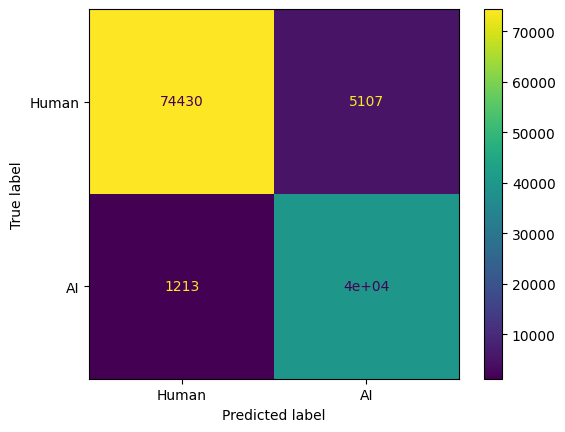

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

model = MultinomialNB()
model.fit(X_train_vector, y_train)
y_pred = model.predict(X_test_vector)
cm = confusion_matrix(y_test, y_pred)

print(f'Dla modelu MultinomialNB mamy wyniki:\n{classification_report(y_test, y_pred)}')
print(f'Confusion_matrix:\n{cm}')
print('-'*50)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Human', 'AI'])
plt.figure(figsize=(5,5))
cm_display.plot()
plt.show()

### Porównanie z modelem RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf_forest = RandomForestClassifier()

params = {
    'max_depth': range(1, 5),
    'min_samples_leaf': range(5, 10)
}

grid_search_model = GridSearchCV(estimator=clf_forest, param_grid=params, scoring='accuracy', cv=3)
grid_search_model.fit(X_train_vector, y_train)
y_pred = grid_search_model.predict(X_test_vector)

cm = confusion_matrix(y_test, y_pred)

print(f'Dla modelu grid_search_model mamy najlepsze parametry: {grid_search_model.best_params_}')
print(f'Dla modelu grid_search_model mamy wyniki:\n{classification_report(y_test, y_pred)}')
print(f'Confusion_matrix:\n{cm}')

Dla modelu grid_search_model mamy najlepsze parametry: {'max_depth': 4, 'min_samples_leaf': 9}
Dla modelu grid_search_model mamy wyniki:
              precision    recall  f1-score   support

         0.0       1.00      0.64      0.78    117451
         1.0       0.07      1.00      0.13      3137

    accuracy                           0.65    120588
   macro avg       0.53      0.82      0.46    120588
weighted avg       0.98      0.65      0.77    120588

Confusion_matrix:
[[75643 41808]
 [    0  3137]]
